<a href="https://colab.research.google.com/github/Rathore25/Reddit-Sentiment-Pre-Post-Covid/blob/main/Visualizing_subreddit_sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import json
import codecs
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
project_dir = '/content/drive/MyDrive/NEU/6120/Final Project/'
subreddits  = ['boston','losangeles','texas','mentalhealth','depression']
periods     = ["Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19","Sep'19","Oct'19","Nov'19","Dec'19",
               "Jan'20","Feb'20","Mar'20","Apr'20","May'20","Jun'20","Jul'20","Aug'20","Sep'20","Oct'20","Nov'20","Dec'20",
               "Jan'21","Feb'21","Mar'21"]

In [3]:
dfs = {}
for subreddit in subreddits:
  dfs[subreddit] = pd.read_csv('{0}{1}_pred.csv'.format(project_dir,subreddit), encoding = 'utf-8-sig')

In [4]:
for subreddit in subreddits:
  print(subreddit, len(dfs[subreddit]))

boston 958043
losangeles 1549751
texas 520942
mentalhealth 555989
depression 1724433


In [5]:
for subreddit in subreddits:
  length = len(dfs[subreddit])
  dfs[subreddit]['sentiment'] = np.zeros(length)
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.2, ['sentiment']] = 1
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.4, ['sentiment']] = 2
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.6, ['sentiment']] = 3
  dfs[subreddit].loc[dfs[subreddit]['prediction'] > 0.8, ['sentiment']] = 4

In [6]:
tot_counts = []
neg_counts = []
pos_counts = []

for subreddit, df in dfs.items():
  tot_count = (df[['period','sentiment']].groupby('period').count()).values
  tot_count = np.squeeze(tot_count)
  tot_counts.append(tot_count)
  neg_count = (df[df['sentiment'] <= 2][['period','sentiment']].groupby('period').count()).values
  neg_count = np.squeeze(neg_count)
  neg_counts.append(neg_count)
  pos_count = (df[df['sentiment'] > 2][['period','sentiment']].groupby('period').count()).values
  pos_count = np.squeeze(pos_count)
  pos_counts.append(pos_count)

tot_counts = np.array(tot_counts)
neg_counts = np.array(neg_counts)
pos_counts = np.array(pos_counts)

In [ ]:
pos_counts = pos_counts/tot_counts
neg_counts = neg_counts/tot_counts

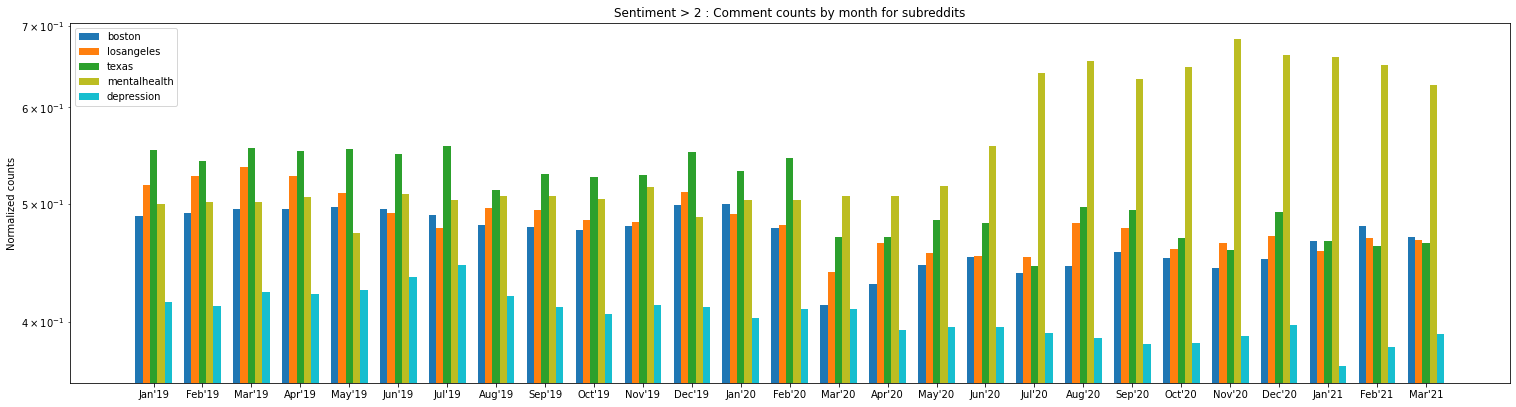

In [ ]:
X   = np.arange(1,28)
fig = plt.figure(figsize=[20,5])
ax  = fig.add_axes([0,0,1,1])
ax.bar(X - 0.30, pos_counts[0], color = 'tab:blue', width = 0.15, log=True)
ax.bar(X - 0.15, pos_counts[1], color = 'tab:orange', width = 0.15, log=True)
ax.bar(X + 0.00, pos_counts[2], color = 'tab:green', width = 0.15, log=True)
ax.bar(X + 0.15, pos_counts[3], color = 'tab:olive', width = 0.15, log=True)
ax.bar(X + 0.30, pos_counts[4], color = 'tab:cyan', width = 0.15, log=True)
ax.legend(labels=subreddits)
ax.set_ylabel('Normalized counts')
ax.set_xticks(X)
ax.set_xticklabels(periods)
ax.set_title("Sentiment > 2 : Comment counts by month for subreddits")
fig.show()

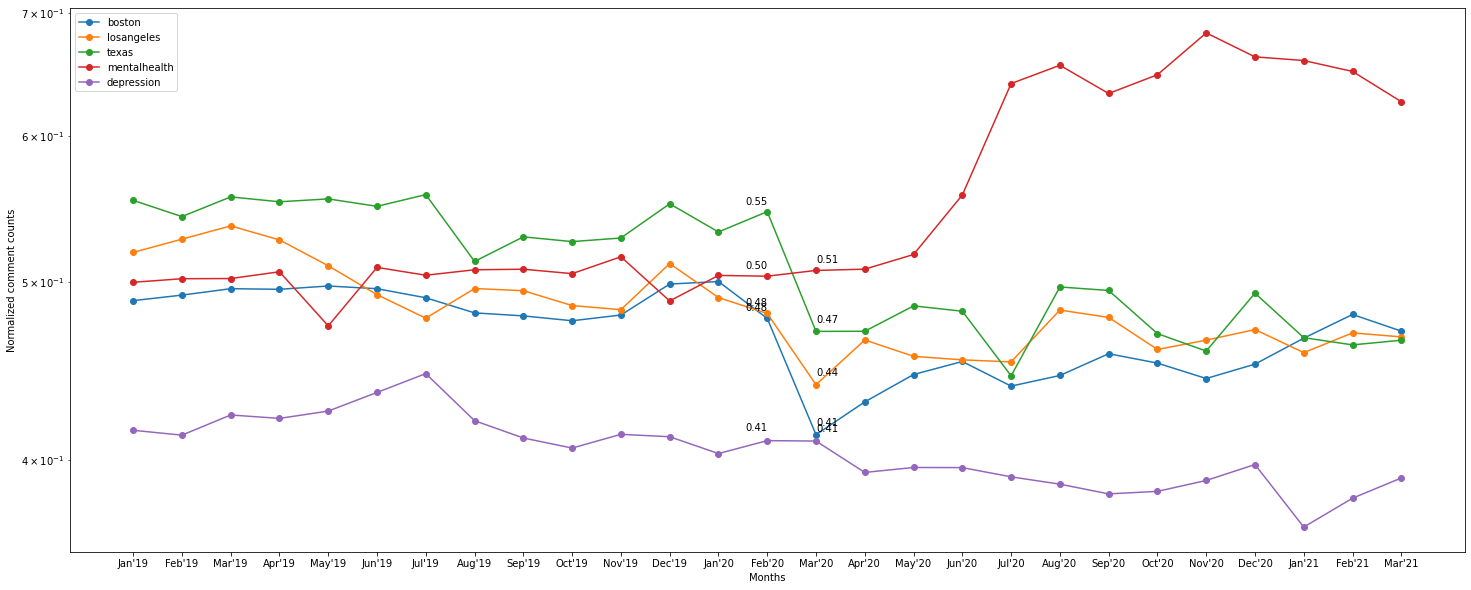

In [ ]:
X   = np.arange(1,28)
fig = plt.figure(figsize=[25,10])
plt.plot(X, np.transpose(pos_counts), marker='o')
plt.yscale("log")
plt.xticks(X,periods)
for i in range(5):
  plt.annotate('{:.2f}'.format(pos_counts[i,14]), (15,pos_counts[i,14]), xytext=(15,pos_counts[i,14] + 0.005), ha='left')
  plt.annotate('{:.2f}'.format(pos_counts[i,13]), (14,pos_counts[i,13]), xytext=(14,pos_counts[i,13] + 0.005), ha='right')
plt.xlabel("Months")
plt.ylabel("Normalized comment counts")
plt.legend(subreddits)
plt.show()

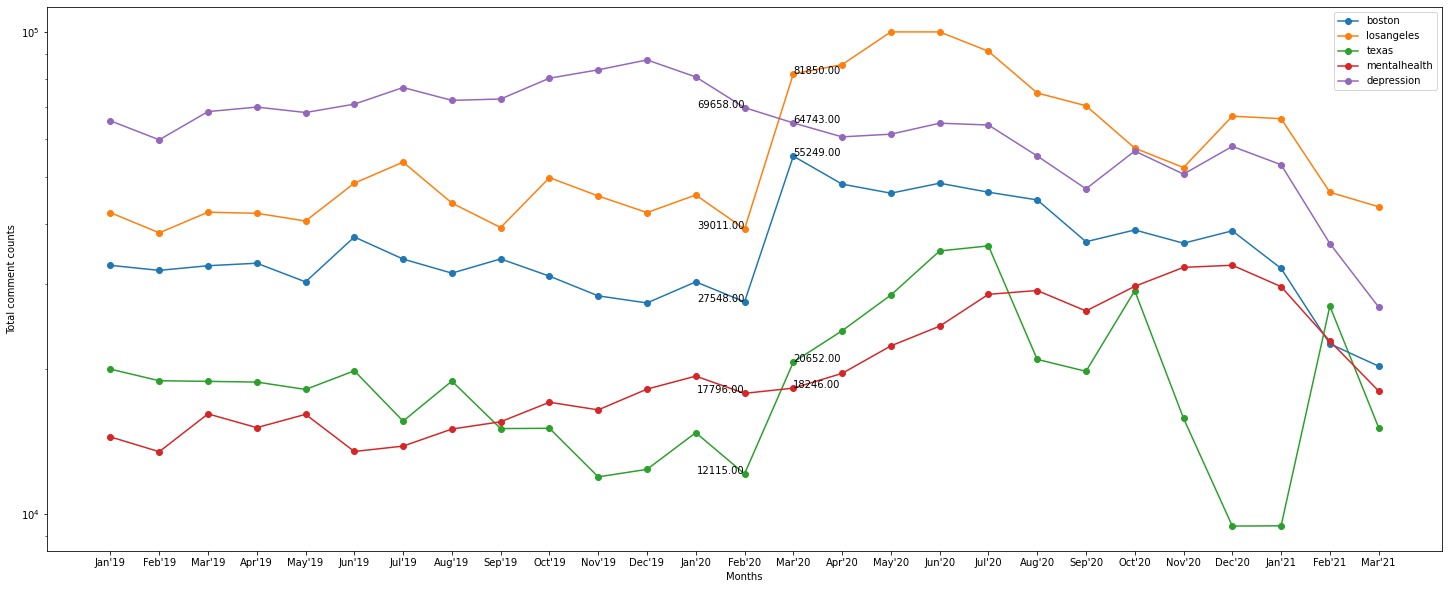

In [ ]:
X   = np.arange(1,28)
fig = plt.figure(figsize=[25,10])
plt.plot(X, np.transpose(tot_counts), marker='o')
plt.yscale("log")
plt.xticks(X,periods)
for i in range(5):
  plt.annotate('{:.2f}'.format(tot_counts[i,14]), (15,tot_counts[i,14]), xytext=(15,tot_counts[i,14] + 0.005), ha='left')
  plt.annotate('{:.2f}'.format(tot_counts[i,13]), (14,tot_counts[i,13]), xytext=(14,tot_counts[i,13] + 0.005), ha='right')
plt.xlabel("Months")
plt.ylabel("Total comment counts")
plt.legend(subreddits)
plt.show()